##### import library

In [92]:
import os
import pandas as pd
import numpy as np

In [93]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error

#### load and describe data

- https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [94]:
data_file= os.path.join(os.getcwd(), 'housing.csv')

In [95]:
df = pd.read_csv(data_file)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [96]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### replace missing data

In [98]:
filt_total_bedrooms = df.total_bedrooms.isna() == False
np.median(df[filt_total_bedrooms]['total_bedrooms'])

435.0

In [99]:
values =  {'total_bedrooms': np.median(df[filt_total_bedrooms]['total_bedrooms'])}
values

{'total_bedrooms': 435.0}

In [100]:
df.fillna(
   values, inplace=True
)

In [101]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### converting non-numeric to numeric column

In [102]:
from sklearn.preprocessing import LabelEncoder
opEncoder = LabelEncoder()
df['ocean_proximity_encoded'] = opEncoder.fit_transform(df.ocean_proximity)

In [103]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1


#### Adding noisy column

- to test if feature selection process is able to discard them.

In [104]:
for i in range(1,4):
    df[f'noisy_feature_{i}'] = 100 * np.random.random_sample(df.shape[0])

In [105]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded,noisy_feature_1,noisy_feature_2,noisy_feature_3
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,81.457508,22.761510,81.669937
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,63.532290,17.217163,57.416960
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,95.278594,69.015850,95.331831
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,82.961947,89.978489,32.386570
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,25.688082,92.380729,71.603983


#### getting X and y from data

In [106]:
y = df.median_house_value
X=df.drop(columns=['median_house_value', 'ocean_proximity'])

#### split into train and valid sets

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=.80, random_state=42)
X_train.shape, X_valid.shape

((16512, 12), (4128, 12))

#### training random forest regressor with grid search

In [108]:
from sklearn.ensemble import RandomForestRegressor
params = {
    'max_depth' : [5,7,9, 11],
    'min_samples_split': [10, 20, 30],
    'n_estimators': [50, 80, 100]
}

model = RandomForestRegressor(random_state=42)
search = GridSearchCV( estimator = model, param_grid = params, n_jobs= 10, cv=3, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=10,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [109]:
search.best_estimator_

RandomForestRegressor(max_depth=11, min_samples_split=10, random_state=42)

In [110]:
search.best_score_

-2938159664.741197

In [111]:
np.mean(y_train)

207194.6937378876

In [112]:
mean_absolute_error(y_train, search.best_estimator_.predict(X_train))

27746.821855264145

In [113]:
mean_absolute_error(y_valid, search.best_estimator_.predict(X_valid))

35511.63129267315

#### getting the shap value 

In [114]:
import shap

explainer = shap.TreeExplainer(search.best_estimator_)

In [115]:
expected_value = explainer.expected_value
expected_value

array([207306.86898377])

In [116]:
shap_values = explainer.shap_values(X_valid)

In [117]:
shap_values_df = pd.DataFrame(data=shap_values, index=X_valid.index, columns=X_valid.columns)
shap_values_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded,noisy_feature_1,noisy_feature_2,noisy_feature_3
20046,5834.392749,-14370.775832,-3231.042295,-1002.030741,-503.676622,-2343.594088,-175.055728,-76088.586499,-56193.229150,-311.651009,-336.827427,-80.216196
3024,8026.701720,-20373.557060,1472.126645,697.733449,-605.369184,-2475.541815,445.192857,-64720.962545,-55381.451184,-284.693822,-225.554837,-135.560083
15663,97583.624561,34067.088892,39317.103449,3965.976183,392.945990,-1565.836570,2634.395826,18395.327765,74463.251178,-1160.193736,284.016749,263.148697
20484,6579.050128,-2709.910053,-11117.851465,510.975426,-3679.811550,-4838.092423,-58.466978,54018.066005,15365.651961,352.363317,-827.819305,536.156044
9814,9484.906876,17116.951239,3413.692601,395.882361,-3023.500822,-696.261136,-806.418742,-7624.589684,31611.126935,-214.882008,-474.395571,429.699599
...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-41215.811008,23583.637567,-9267.496441,2515.790738,493.233850,-1207.830978,115.068933,14803.018978,15606.552895,1154.710630,-201.241464,-397.130964
16623,8394.348669,8725.165283,807.447834,2083.484915,3006.191151,-2986.509685,935.968631,-58411.665689,49529.054117,-466.640807,-110.561517,-326.428061
18086,20000.580619,1049.496357,4732.881716,1462.023304,2255.713656,-809.186663,1432.883435,229530.511670,14470.916243,319.014870,-15491.821800,84.401868
2144,8399.401938,-18370.332414,2129.785413,273.425377,-378.706504,-1539.756489,201.981320,-62477.233206,-56694.272746,408.429360,2818.161778,-209.792272


#### check if approx prediction ~ exact prediction

In [118]:
result_df = pd.DataFrame(
    data = { 'approx_prediction' : np.round((expected_value + np.sum(shap_values, axis=1)), 2)}
)
result_df

,approx_prediction
0,58504.58
1,73745.93
2,475947.72
3,261437.18
4,256919.08
...,...
4123,213289.37
4124,218486.72
4125,466344.28
4126,81867.96


In [119]:
result_df['estimated_prediction'] = np.round(search.best_estimator_.predict(X_valid), 2)

In [120]:
result_df['diff'] = np.abs(result_df.approx_prediction - result_df.estimated_prediction)
result_df

,approx_prediction,estimated_prediction,diff
0,58504.58,58504.58,0.0
1,73745.93,73745.93,0.0
2,475947.72,475947.72,0.0
3,261437.18,261437.18,0.0
4,256919.08,256919.08,0.0
...,...,...,...
4123,213289.37,213289.37,0.0
4124,218486.72,218486.72,0.0
4125,466344.28,466344.28,0.0
4126,81867.96,81867.96,0.0


<AxesSubplot: xlabel='diff', ylabel='Count'>

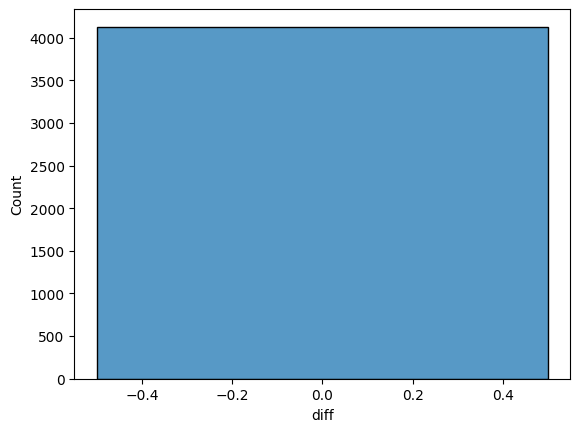

In [121]:
import seaborn as sns

sns.histplot(result_df['diff'])


#### perform feature selection using approx prediction

In [122]:
from itertools import combinations


In [123]:
fs_df = pd.DataFrame( columns=['features', 'Mean_abs_error'])
feature_list = []
mae_list = []
for i in range(1,X_valid.shape[1] + 1):
    for j in combinations(list(range(0,X_valid.shape[1])), i):
        feature_list.append(j)
        mae_list.append(
          mean_absolute_error(
              y_valid, expected_value + np.sum(shap_values[:,j], axis=1)
          )  
        )

In [124]:
fs_df = pd.DataFrame(
    data = {
        'feature' : feature_list,
        'mae' : mae_list
    }
)
# fs_df

In [125]:
fs_df.sort_values(by='mae', ascending=True)

,feature,mae
3796,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",35433.430908
4018,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 11)",35447.384566
3306,"(0, 1, 2, 3, 4, 5, 7, 8)",35464.739040
4016,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",35465.230801
4017,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)",35465.395409
...,...,...
75,"(9, 10)",90643.722351
11,"(11,)",90645.007560
76,"(9, 11)",90652.265469
77,"(10, 11)",90653.415509


- The minimum mae (mean absolute error) is with the feature set where noisy features are not present. Thus the feature selection effectivly discarded the non contributing feature.

In [126]:
for idx, col_name in enumerate(X_valid.columns):
    print(f'{idx} -- {col_name}')

0 -- longitude
1 -- latitude
2 -- housing_median_age
3 -- total_rooms
4 -- total_bedrooms
5 -- population
6 -- households
7 -- median_income
8 -- ocean_proximity_encoded
9 -- noisy_feature_1
10 -- noisy_feature_2
11 -- noisy_feature_3
